# **U-Net (2D)**
---

<font size = 4>U-Net is an encoder-decoder network architecture originally used for image segmentation, first published by [Ronneberger *et al.*](https://arxiv.org/abs/1505.04597). The first half of the U-Net architecture is a downsampling convolutional neural network which acts as a feature extractor from input images. The other half upsamples these results and restores an image by combining results from downsampling with the upsampled images.

<font size = 4> **This particular notebook enables image segmentation of 2D dataset. If you are interested in 3D dataset, you should use the 3D U-Net notebook instead.**

---
<font size = 4>*Disclaimer*:

<font size = 4>This notebook is part of the Zero-Cost Deep-Learning to Enhance Microscopy project (https://github.com/HenriquesLab/DeepLearning_Collab/wiki). Jointly developed by the Jacquemet (link to https://cellmig.org/) and Henriques (https://henriqueslab.github.io/) laboratories.

<font size = 4>This notebook is largely based on the papers: 

<font size = 4>**U-Net: Convolutional Networks for Biomedical Image Segmentation** by Ronneberger *et al.*  published on arXiv in 2015 (https://arxiv.org/abs/1505.04597)

<font size = 4>and 

<font size = 4>**U-Net: deep learning for cell counting, detection, and morphometry** by Thorsten Falk *et al.* in Nature Methods 2019
(https://www.nature.com/articles/s41592-018-0261-2)
And source code found in: https://github.com/zhixuhao/unet by *Zhixuhao*

<font size = 4>**Please also cite this original paper when using or developing this notebook.** 

# **How to use this notebook?**

---

<font size = 4>Video describing how to use our notebooks are available on youtube:
  - [**Video 1**](https://www.youtube.com/watch?v=GzD2gamVNHI&feature=youtu.be): Full run through of the workflow to obtain the notebooks and the provided test datasets as well as a common use of the notebook
  - [**Video 2**](https://www.youtube.com/watch?v=PUuQfP5SsqM&feature=youtu.be): Detailed description of the different sections of the notebook



---
###**Structure of a notebook**

<font size = 4>The notebook contains two types of cell:  

<font size = 4>**Text cells** provide information and can be modified by douple-clicking the cell. You are currently reading the text cell. You can create a new text by clicking `+ Text`.

<font size = 4>**Code cells** contain code and the code can be modfied by selecting the cell. To execute the cell, move your cursor on the `[ ]`-mark on the left side of the cell (play button appears). Click to execute the cell. After execution is done the animation of play button stops. You can create a new coding cell by clicking `+ Code`.

---
###**Table of contents, Code snippets** and **Files**

<font size = 4>On the top left side of the notebook you find three tabs which contain from top to bottom:

<font size = 4>*Table of contents* = contains structure of the notebook. Click the content to move quickly between sections.

<font size = 4>*Code snippets* = contain examples how to code certain tasks. You can ignore this when using this notebook.

<font size = 4>*Files* = contain all available files. After mounting your google drive (see section 1.) you will find your files and folders here. 

<font size = 4>**Remember that all uploaded files are purged after changing the runtime.** All files saved in Google Drive will remain. You do not need to use the Mount Drive-button; your Google Drive is connected in section 1.2.

<font size = 4>**Note:** The "sample data" in "Files" contains default files. Do not upload anything in here!

---
###**Making changes to the notebook**

<font size = 4>**You can make a copy** of the notebook and save it to your Google Drive. To do this click file -> save a copy in drive.

<font size = 4>To **edit a cell**, double click on the text. This will show you either the source code (in code cells) or the source text (in text cells).
You can use the `#`-mark in code cells to comment out parts of the code. This allows you to keep the original code piece in the cell as a comment.

# **0. Before getting started**
---

<font size = 4>Before you run the notebook, please ensure that you are logged into your Google account and have the training and/or data to process in your Google Drive.

<font size = 4>For U-Net to train, **it needs to have access to a paired training dataset corresponding to images and their corresponding masks**. Information on how to generate a training dataset is available in our Wiki page: https://github.com/HenriquesLab/ZeroCostDL4Mic/wiki

<font size = 4>**We strongly recommend that you generate extra paired images. These images can be used to assess the quality of your trained model (Quality control dataset)**. The quality control assessment can be done directly in this notebook.

<font size = 4>Additionally, the corresponding Training_source and Training_target files need to have **the same name**.

<font size = 4>Here's a common data structure that can work:
*   Experiment A
    - **Training dataset**
      - Training_source
        - img_1.tif, img_2.tif, ...
      - Training_target
        - img_1.tif, img_2.tif, ...
    - **Quality control dataset**
     - Training_source
        - img_1.tif, img_2.tif
      - Training_target 
        - img_1.tif, img_2.tif
    - **Data to be predicted**
    - **Results**

---
<font size = 4>**Important note**

<font size = 4>- If you wish to **Train a network from scratch** using your own dataset (and we encourage everyone to do that), you will need to run **sections 1 - 4**, then use **section 5** to assess the quality of your model and **section 6** to run predictions using the model that you trained.

<font size = 4>- If you wish to **Evaluate your model** using a model previously generated and saved on your Google Drive, you will only need to run **sections 1 and 2** to set up the notebook, then use **section 5** to assess the quality of your model.

<font size = 4>- If you only wish to **run predictions** using a model previously generated and saved on your Google Drive, you will only need to run **sections 1 and 2** to set up the notebook, then use **section 6** to run the predictions on the desired model.
---

# **1. Install U-Net dependencies**
---


## **1.1. Install key dependencies**
---
<font size = 4> 

In [1]:
#@markdown ##Play to install U-Net dependencies

!pip install data
!pip install fpdf
!pip install h5py==2.10

#Force session restart
exit(0)

  Created wheel for data: filename=data-0.4-py3-none-any.whl size=7246 sha256=e04579ef8d2432770c8d7895aefca983eb9f6a7dba6e2b2415d629955c23237a
  Stored in directory: /root/.cache/pip/wheels/28/76/4b/7db27e02c1de4d2181559d108fcdfed1680ff7d3534553d460
Successfully built data
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40722 sha256=e360a8b4cb8caa71ee18b35f010fd62e1c57e41b60fe9f6331a29e81effdbc9b
  Stored in directory: /root/.cache/pip/wheels/d7/ca/c8/86467e7957bbbcbdf4cf4870fc7dc95e9a16404b2e3c3a98c3
Successfully built fpdf
     |████████████████████████████████| 2.9 MB 7.6 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.5.0 requires h5py~=3.1.0, but you have h5py 2.10.0 which


## **1.2. Restart your runtime**
---
<font size = 4>


**<font size = 4> Ignore the following message error message. Your Runtime has automatically restarted. This is normal.**

<img width="40%" alt ="" src="https://github.com/HenriquesLab/ZeroCostDL4Mic/raw/master/Wiki_files/session_crash.png"><figcaption>  </figcaption>

## **1.3. Load key dependencies**
---
<font size = 4> 

In [1]:
Notebook_version = '1.13'
Network = 'U-Net (2D)'


from builtins import any as b_any

def get_requirements_path():
    # Store requirements file in 'contents' directory 
    current_dir = os.getcwd()
    dir_count = current_dir.count('/') - 1
    path = '../' * (dir_count) + 'requirements.txt'
    return path

def filter_files(file_list, filter_list):
    filtered_list = []
    for fname in file_list:
        if b_any(fname.split('==')[0] in s for s in filter_list):
            filtered_list.append(fname)
    return filtered_list

def build_requirements_file(before, after):
    path = get_requirements_path()

    # Exporting requirements.txt for local run
    !pip freeze > $path

    # Get minimum requirements file
    df = pd.read_csv(path, delimiter = "\n")
    mod_list = [m.split('.')[0] for m in after if not m in before]
    req_list_temp = df.values.tolist()
    req_list = [x[0] for x in req_list_temp]

    # Replace with package name and handle cases where import name is different to module name
    mod_name_list = [['sklearn', 'scikit-learn'], ['skimage', 'scikit-image']]
    mod_replace_list = [[x[1] for x in mod_name_list] if s in [x[0] for x in mod_name_list] else s for s in mod_list] 
    filtered_list = filter_files(req_list, mod_replace_list)

    file=open(path,'w')
    for item in filtered_list:
        file.writelines(item + '\n')

    file.close()

import sys
before = [str(m) for m in sys.modules]

#@markdown ##Load key U-Net dependencies

#As this notebokk depends mostly on keras which runs a tensorflow backend (which in turn is pre-installed in colab)
#only the data library needs to be additionally installed.
%tensorflow_version 1.x
import tensorflow as tf
# print(tensorflow.__version__)
# print("Tensorflow enabled.")


# Keras imports
from keras import models
from keras.models import Model, load_model
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, concatenate, UpSampling2D
from keras.optimizers import Adam
# from keras.callbacks import ModelCheckpoint, LearningRateScheduler, CSVLogger # we currently don't use any other callbacks from ModelCheckpoints
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras import backend as keras

# General import
from __future__ import print_function
import numpy as np
import pandas as pd
import os
import glob
from skimage import img_as_ubyte, io, transform
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.pyplot import imread
from pathlib import Path
import shutil
import random
import time
import csv
import sys
from math import ceil
from fpdf import FPDF, HTMLMixin
from pip._internal.operations.freeze import freeze
import subprocess
# Imports for QC
from PIL import Image
from scipy import signal
from scipy import ndimage
from sklearn.linear_model import LinearRegression
from skimage.util import img_as_uint
from skimage.metrics import structural_similarity
from skimage.metrics import peak_signal_noise_ratio as psnr

# For sliders and dropdown menu and progress bar
from ipywidgets import interact
import ipywidgets as widgets
# from tqdm import tqdm
from tqdm.notebook import tqdm

from sklearn.feature_extraction import image
from skimage import img_as_ubyte, io, transform
from skimage.util.shape import view_as_windows

from datetime import datetime


# Suppressing some warnings
import warnings
warnings.filterwarnings('ignore')




def create_patches(Training_source, Training_target, patch_width, patch_height, min_fraction):
  """
  Function creates patches from the Training_source and Training_target images. 
  The steps parameter indicates the offset between patches and, if integer, is the same in x and y.
  Saves all created patches in two new directories in the /content folder.

  min_fraction is the minimum fraction of pixels that need to be foreground to be considered as a valid patch

  Returns: - Two paths to where the patches are now saved
  """
  DEBUG = False

  Patch_source = os.path.join('/content','img_patches')
  Patch_target = os.path.join('/content','mask_patches')
  Patch_rejected = os.path.join('/content','rejected')
  

  #Here we save the patches, in the /content directory as they will not usually be needed after training
  if os.path.exists(Patch_source):
    shutil.rmtree(Patch_source)
  if os.path.exists(Patch_target):
    shutil.rmtree(Patch_target)
  if os.path.exists(Patch_rejected):
    shutil.rmtree(Patch_rejected)

  os.mkdir(Patch_source)
  os.mkdir(Patch_target)
  os.mkdir(Patch_rejected) #This directory will contain the images that have too little signal.
  
  patch_num = 0

  for file in tqdm(os.listdir(Training_source)):

    img = io.imread(os.path.join(Training_source, file))
    mask = io.imread(os.path.join(Training_target, file),as_gray=True)

    if DEBUG:
      print(file)
      print(img.dtype)

    # Using view_as_windows with step size equal to the patch size to ensure there is no overlap
    patches_img = view_as_windows(img, (patch_width, patch_height), (patch_width, patch_height))
    patches_mask = view_as_windows(mask, (patch_width, patch_height), (patch_width, patch_height))

    patches_img = patches_img.reshape(patches_img.shape[0]*patches_img.shape[1], patch_width,patch_height)
    patches_mask = patches_mask.reshape(patches_mask.shape[0]*patches_mask.shape[1], patch_width,patch_height)

    if DEBUG:
      print(all_patches_img.shape)
      print(all_patches_img.dtype)

    for i in range(patches_img.shape[0]):
      img_save_path = os.path.join(Patch_source,'patch_'+str(patch_num)+'.tif')
      mask_save_path = os.path.join(Patch_target,'patch_'+str(patch_num)+'.tif')
      patch_num += 1

      # if the mask conatins at least 2% of its total number pixels as mask, then go ahead and save the images
      pixel_threshold_array = sorted(patches_mask[i].flatten())
      if pixel_threshold_array[int(round(len(pixel_threshold_array)*(1-min_fraction)))]>0:
        io.imsave(img_save_path, img_as_ubyte(normalizeMinMax(patches_img[i])))
        io.imsave(mask_save_path, convert2Mask(normalizeMinMax(patches_mask[i]),0))
      else:
        io.imsave(Patch_rejected+'/patch_'+str(patch_num)+'_image.tif', img_as_ubyte(normalizeMinMax(patches_img[i])))
        io.imsave(Patch_rejected+'/patch_'+str(patch_num)+'_mask.tif', convert2Mask(normalizeMinMax(patches_mask[i]),0))

  return Patch_source, Patch_target


def estimatePatchSize(data_path, max_width = 512, max_height = 512):

  files = os.listdir(data_path)
  
  # Get the size of the first image found in the folder and initialise the variables to that
  n = 0 
  while os.path.isdir(os.path.join(data_path, files[n])):
    n += 1
  (height_min, width_min) = Image.open(os.path.join(data_path, files[n])).size

  # Screen the size of all dataset to find the minimum image size
  for file in files:
    if not os.path.isdir(os.path.join(data_path, file)):
      (height, width) = Image.open(os.path.join(data_path, file)).size
      if width < width_min:
        width_min = width
      if height < height_min:
        height_min = height
  
  # Find the power of patches that will fit within the smallest dataset
  width_min, height_min = (fittingPowerOfTwo(width_min), fittingPowerOfTwo(height_min))

  # Clip values at maximum permissible values
  if width_min > max_width:
    width_min = max_width

  if height_min > max_height:
    height_min = max_height
  
  return (width_min, height_min)

def fittingPowerOfTwo(number):
  n = 0
  while 2**n <= number:
    n += 1 
  return 2**(n-1)


def getClassWeights(Training_target_path):

  Mask_dir_list = os.listdir(Training_target_path)
  number_of_dataset = len(Mask_dir_list)

  class_count = np.zeros(2, dtype=int)
  for i in tqdm(range(number_of_dataset)):
    mask = io.imread(os.path.join(Training_target_path, Mask_dir_list[i]))
    mask = normalizeMinMax(mask)
    class_count[0] += mask.shape[0]*mask.shape[1] - mask.sum()
    class_count[1] += mask.sum()

  n_samples = class_count.sum()
  n_classes = 2

  class_weights = n_samples / (n_classes * class_count)
  return class_weights

def weighted_binary_crossentropy(class_weights):

    def _weighted_binary_crossentropy(y_true, y_pred):
        binary_crossentropy = keras.binary_crossentropy(y_true, y_pred)
        weight_vector = y_true * class_weights[1] + (1. - y_true) * class_weights[0]
        weighted_binary_crossentropy = weight_vector * binary_crossentropy

        return keras.mean(weighted_binary_crossentropy)

    return _weighted_binary_crossentropy


def save_augment(datagen,orig_img,dir_augmented_data="/content/augment"):
  """
  Saves a subset of the augmented data for visualisation, by default in /content.

  This is adapted from: https://fairyonice.github.io/Learn-about-ImageDataGenerator.html
  
  """
  try:
    os.mkdir(dir_augmented_data)
  except:
        ## if the preview folder exists, then remove
        ## the contents (pictures) in the folder
    for item in os.listdir(dir_augmented_data):
      os.remove(dir_augmented_data + "/" + item)

    ## convert the original image to array
  x = img_to_array(orig_img)
    ## reshape (Sampke, Nrow, Ncol, 3) 3 = R, G or B
    #print(x.shape)
  x = x.reshape((1,) + x.shape)
    #print(x.shape)
    ## -------------------------- ##
    ## randomly generate pictures
    ## -------------------------- ##
  i = 0
    #We will just save 5 images,
    #but this can be changed, but note the visualisation in 3. currently uses 5.
  Nplot = 5
  for batch in datagen.flow(x,batch_size=1,
                            save_to_dir=dir_augmented_data,
                            save_format='tif',
                            seed=42):
    i += 1
    if i > Nplot - 1:
      break

# Generators
def buildDoubleGenerator(image_datagen, mask_datagen, image_folder_path, mask_folder_path, subset, batch_size, target_size):
  '''
  Can generate image and mask at the same time use the same seed for image_datagen and mask_datagen to ensure the transformation for image and mask is the same
  
  datagen: ImageDataGenerator 
  subset: can take either 'training' or 'validation'
  '''
  seed = 1
  image_generator = image_datagen.flow_from_directory(
      os.path.dirname(image_folder_path),
      classes = [os.path.basename(image_folder_path)],
      class_mode = None,
      color_mode = "grayscale",
      target_size = target_size,
      batch_size = batch_size,
      subset = subset,
      interpolation = "bicubic",
      seed = seed)
  
  mask_generator = mask_datagen.flow_from_directory(
      os.path.dirname(mask_folder_path),
      classes = [os.path.basename(mask_folder_path)],
      class_mode = None,
      color_mode = "grayscale",
      target_size = target_size,
      batch_size = batch_size,
      subset = subset,
      interpolation = "nearest",
      seed = seed)
  
  this_generator = zip(image_generator, mask_generator)
  for (img,mask) in this_generator:
      # img,mask = adjustData(img,mask)
      yield (img,mask)


def prepareGenerators(image_folder_path, mask_folder_path, datagen_parameters, batch_size = 4, target_size = (512, 512)):
  image_datagen = ImageDataGenerator(**datagen_parameters, preprocessing_function = normalizePercentile)
  mask_datagen = ImageDataGenerator(**datagen_parameters, preprocessing_function = normalizeMinMax)

  train_datagen = buildDoubleGenerator(image_datagen, mask_datagen, image_folder_path, mask_folder_path, 'training', batch_size, target_size)
  validation_datagen = buildDoubleGenerator(image_datagen, mask_datagen, image_folder_path, mask_folder_path, 'validation', batch_size, target_size)

  return (train_datagen, validation_datagen)


# Normalization functions from Martin Weigert
def normalizePercentile(x, pmin=1, pmax=99.8, axis=None, clip=False, eps=1e-20, dtype=np.float32):
    """This function is adapted from Martin Weigert"""
    """Percentile-based image normalization."""

    mi = np.percentile(x,pmin,axis=axis,keepdims=True)
    ma = np.percentile(x,pmax,axis=axis,keepdims=True)
    return normalize_mi_ma(x, mi, ma, clip=clip, eps=eps, dtype=dtype)


def normalize_mi_ma(x, mi, ma, clip=False, eps=1e-20, dtype=np.float32):#dtype=np.float32
    """This function is adapted from Martin Weigert"""
    if dtype is not None:
        x   = x.astype(dtype,copy=False)
        mi  = dtype(mi) if np.isscalar(mi) else mi.astype(dtype,copy=False)
        ma  = dtype(ma) if np.isscalar(ma) else ma.astype(dtype,copy=False)
        eps = dtype(eps)

    try:
        import numexpr
        x = numexpr.evaluate("(x - mi) / ( ma - mi + eps )")
    except ImportError:
        x =                   (x - mi) / ( ma - mi + eps )

    if clip:
        x = np.clip(x,0,1)

    return x



# Simple normalization to min/max fir the Mask
def normalizeMinMax(x, dtype=np.float32):
  x = x.astype(dtype,copy=False)
  x = (x - np.amin(x)) / (np.amax(x) - np.amin(x))
  return x


# This is code outlines the architecture of U-net. The choice of pooling steps decides the depth of the network. 
def unet(pretrained_weights = None, input_size = (256,256,1), pooling_steps = 4, learning_rate = 1e-4, verbose=True, class_weights=np.ones(2)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    # Downsampling steps
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    
    if pooling_steps > 1:
      pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
      conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
      conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)

      if pooling_steps > 2:
        pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
        conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
        conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
        drop4 = Dropout(0.5)(conv4)
      
        if pooling_steps > 3:
          pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)
          conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
          conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
          drop5 = Dropout(0.5)(conv5)

          #Upsampling steps
          up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
          merge6 = concatenate([drop4,up6], axis = 3)
          conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
          conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)
          
    if pooling_steps > 2:
      up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop4))
      if pooling_steps > 3:
        up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
      merge7 = concatenate([conv3,up7], axis = 3)
      conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
      conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    if pooling_steps > 1:
      up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv3))
      if pooling_steps > 2:
        up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
      merge8 = concatenate([conv2,up8], axis = 3)
      conv8 = Conv2D(128, 3, activation= 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
      conv8 = Conv2D(128, 3, activation= 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)
      
    if pooling_steps == 1:
      up9 = Conv2D(64, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv2))
    else:
      up9 = Conv2D(64, 2, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8)) #activation = 'relu'
    
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(merge9) #activation = 'relu'
    conv9 = Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal')(conv9) #activation = 'relu'
    conv9 = Conv2D(2, 3, padding = 'same', kernel_initializer = 'he_normal')(conv9) #activation = 'relu'
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = Model(inputs = inputs, outputs = conv10)

    # model.compile(optimizer = Adam(lr = learning_rate), loss = 'binary_crossentropy', metrics = ['acc'])
    model.compile(optimizer = Adam(lr = learning_rate), loss = weighted_binary_crossentropy(class_weights))


    if verbose:
      model.summary()

    if(pretrained_weights):
    	model.load_weights(pretrained_weights);

    return model



def predict_as_tiles(Image_path, model):

  # Read the data in and normalize
  Image_raw = io.imread(Image_path, as_gray = True)
  Image_raw = normalizePercentile(Image_raw)

  # Get the patch size from the input layer of the model
  patch_size = model.layers[0].output_shape[1:3]

  # Pad the image with zeros if any of its dimensions is smaller than the patch size
  if Image_raw.shape[0] < patch_size[0] or Image_raw.shape[1] < patch_size[1]:
    Image = np.zeros((max(Image_raw.shape[0], patch_size[0]), max(Image_raw.shape[1], patch_size[1])))
    Image[0:Image_raw.shape[0], 0: Image_raw.shape[1]] = Image_raw
  else:
    Image = Image_raw

  # Calculate the number of patches in each dimension
  n_patch_in_width = ceil(Image.shape[0]/patch_size[0])
  n_patch_in_height = ceil(Image.shape[1]/patch_size[1])

  prediction = np.zeros(Image.shape)

  for x in range(n_patch_in_width):
    for y in range(n_patch_in_height):
      xi = patch_size[0]*x
      yi = patch_size[1]*y

      # If the patch exceeds the edge of the image shift it back 
      if xi+patch_size[0] >= Image.shape[0]:
        xi = Image.shape[0]-patch_size[0]

      if yi+patch_size[1] >= Image.shape[1]:
        yi = Image.shape[1]-patch_size[1]
      
      # Extract and reshape the patch
      patch = Image[xi:xi+patch_size[0], yi:yi+patch_size[1]]
      patch = np.reshape(patch,patch.shape+(1,))
      patch = np.reshape(patch,(1,)+patch.shape)

      # Get the prediction from the patch and paste it in the prediction in the right place
      predicted_patch = model.predict(patch, batch_size = 1)
      prediction[xi:xi+patch_size[0], yi:yi+patch_size[1]] = np.squeeze(predicted_patch)


  return prediction[0:Image_raw.shape[0], 0: Image_raw.shape[1]]
  



def saveResult(save_path, nparray, source_dir_list, prefix='', threshold=None):
  for (filename, image) in zip(source_dir_list, nparray):
      io.imsave(os.path.join(save_path, prefix+os.path.splitext(filename)[0]+'.tif'), img_as_ubyte(image)) # saving as unsigned 8-bit image
      
      # For masks, threshold the images and return 8 bit image
      if threshold is not None:
        mask = convert2Mask(image, threshold)
        io.imsave(os.path.join(save_path, prefix+'mask_'+os.path.splitext(filename)[0]+'.tif'), mask)


def convert2Mask(image, threshold):
  mask = img_as_ubyte(image, force_copy=True)
  mask[mask > threshold] = 255
  mask[mask <= threshold] = 0
  return mask


def getIoUvsThreshold(prediction_filepath, groud_truth_filepath):
  prediction = io.imread(prediction_filepath)
  ground_truth_image = img_as_ubyte(io.imread(groud_truth_filepath, as_gray=True), force_copy=True)

  threshold_list = []
  IoU_scores_list = []

  for threshold in range(0,256): 
    # Convert to 8-bit for calculating the IoU
    mask = img_as_ubyte(prediction, force_copy=True)
    mask[mask > threshold] = 255
    mask[mask <= threshold] = 0

    # Intersection over Union metric
    intersection = np.logical_and(ground_truth_image, np.squeeze(mask))
    union = np.logical_or(ground_truth_image, np.squeeze(mask))
    iou_score = np.sum(intersection) / np.sum(union)

    threshold_list.append(threshold)
    IoU_scores_list.append(iou_score)

  return (threshold_list, IoU_scores_list)



# -------------- Other definitions -----------
W  = '\033[0m'  # white (normal)
R  = '\033[31m' # red
prediction_prefix = 'Predicted_'


print('-------------------')
print('U-Net and dependencies installed.')

# Colors for the warning messages
class bcolors:
  WARNING = '\033[31m'

# Check if this is the latest version of the notebook

All_notebook_versions = pd.read_csv("https://raw.githubusercontent.com/HenriquesLab/ZeroCostDL4Mic/master/Colab_notebooks/Latest_Notebook_versions.csv", dtype=str)
print('Notebook version: '+Notebook_version)
Latest_Notebook_version = All_notebook_versions[All_notebook_versions["Notebook"] == Network]['Version'].iloc[0]
print('Latest notebook version: '+Latest_Notebook_version)
if Notebook_version == Latest_Notebook_version:
  print("This notebook is up-to-date.")
else:
  print(bcolors.WARNING +"A new version of this notebook has been released. We recommend that you download it at https://github.com/HenriquesLab/ZeroCostDL4Mic/wiki")


def pdf_export(trained = False, augmentation = False, pretrained_model = False):
  class MyFPDF(FPDF, HTMLMixin):
    pass

  pdf = MyFPDF()
  pdf.add_page()
  pdf.set_right_margin(-1)
  pdf.set_font("Arial", size = 11, style='B') 




  day = datetime.now()
  datetime_str = str(day)[0:10]

  Header = 'Training report for '+Network+' model ('+model_name+')\nDate: '+datetime_str
  pdf.multi_cell(180, 5, txt = Header, align = 'L') 
    
  # add another cell 
  if trained:
    training_time = "Training time: "+str(hour)+ "hour(s) "+str(mins)+"min(s) "+str(round(sec))+"sec(s)"
    pdf.cell(190, 5, txt = training_time, ln = 1, align='L')
  pdf.ln(1)

  Header_2 = 'Information for your materials and method:'
  pdf.cell(190, 5, txt=Header_2, ln=1, align='L')

  all_packages = ''
  for requirement in freeze(local_only=True):
    all_packages = all_packages+requirement+', '
  #print(all_packages)

  #Main Packages
  main_packages = ''
  version_numbers = []
  for name in ['tensorflow','numpy','Keras']:
    find_name=all_packages.find(name)
    main_packages = main_packages+all_packages[find_name:all_packages.find(',',find_name)]+', '
    #Version numbers only here:
    version_numbers.append(all_packages[find_name+len(name)+2:all_packages.find(',',find_name)])

  cuda_version = subprocess.run('nvcc --version',stdout=subprocess.PIPE, shell=True)
  cuda_version = cuda_version.stdout.decode('utf-8')
  cuda_version = cuda_version[cuda_version.find(', V')+3:-1]
  gpu_name = subprocess.run('nvidia-smi',stdout=subprocess.PIPE, shell=True)
  gpu_name = gpu_name.stdout.decode('utf-8')
  gpu_name = gpu_name[gpu_name.find('Tesla'):gpu_name.find('Tesla')+10]
  #print(cuda_version[cuda_version.find(', V')+3:-1])
  #print(gpu_name)
  loss = str(model.loss)[str(model.loss).find('function')+len('function'):str(model.loss).find('.<')]
  shape = io.imread(Training_source+'/'+os.listdir(Training_source)[1]).shape
  dataset_size = len(os.listdir(Training_source))

  text = 'The '+Network+' model was trained from scratch for '+str(number_of_epochs)+' epochs on '+str(number_of_training_dataset)+' paired image patches (image dimensions: '+str(shape)+', patch size: ('+str(patch_width)+','+str(patch_height)+')) with a batch size of '+str(batch_size)+' and a'+loss+' loss function,'+' using the '+Network+' ZeroCostDL4Mic notebook (v '+Notebook_version[0]+') (von Chamier & Laine et al., 2020). Key python packages used include tensorflow (v '+version_numbers[0]+'), Keras (v '+version_numbers[2]+'), numpy (v '+version_numbers[1]+'), cuda (v '+cuda_version+'). The training was accelerated using a '+gpu_name+'GPU.'

  if pretrained_model:
    text = 'The '+Network+' model was trained for '+str(number_of_epochs)+' epochs on '+str(number_of_training_dataset)+' paired image patches (image dimensions: '+str(shape)+', patch size: ('+str(patch_width)+','+str(patch_height)+')) with a batch size of '+str(batch_size)+'  and a'+loss+' loss function,'+' using the '+Network+' ZeroCostDL4Mic notebook (v '+Notebook_version[0]+') (von Chamier & Laine et al., 2020). The model was re-trained from a pretrained model. Key python packages used include tensorflow (v '+version_numbers[0]+'), Keras (v '+version_numbers[2]+'), numpy (v '+version_numbers[1]+'), cuda (v '+cuda_version+'). The training was accelerated using a '+gpu_name+'GPU.'

  pdf.set_font('')
  pdf.set_font_size(10.)
  pdf.multi_cell(180, 5, txt = text, align='L')
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.ln(1)
  pdf.cell(28, 5, txt='Augmentation: ', ln=1)
  pdf.set_font('')
  if augmentation:
    aug_text = 'The dataset was augmented by'
    if rotation_range != 0:
      aug_text = aug_text+'\n- rotation'
    if horizontal_flip == True or vertical_flip == True:
      aug_text = aug_text+'\n- flipping'
    if zoom_range != 0:
      aug_text = aug_text+'\n- random zoom magnification'
    if horizontal_shift != 0 or vertical_shift != 0:
      aug_text = aug_text+'\n- shifting'
    if shear_range != 0:
      aug_text = aug_text+'\n- image shearing'
  else:
    aug_text = 'No augmentation was used for training.'
  pdf.multi_cell(190, 5, txt=aug_text, align='L')
  pdf.set_font('Arial', size = 11, style = 'B')
  pdf.ln(1)
  pdf.cell(180, 5, txt = 'Parameters', align='L', ln=1)
  pdf.set_font('')
  pdf.set_font_size(10.)
  if Use_Default_Advanced_Parameters:
    pdf.cell(200, 5, txt='Default Advanced Parameters were enabled')
  pdf.cell(200, 5, txt='The following parameters were used for training:')
  pdf.ln(1)
  html = """ 
  <table width=40% style="margin-left:0px;">
    <tr>
      <th width = 50% align="left">Parameter</th>
      <th width = 50% align="left">Value</th>
    </tr>
    <tr>
      <td width = 50%>number_of_epochs</td>
      <td width = 50%>{0}</td>
    </tr>
    <tr>
      <td width = 50%>patch_size</td>
      <td width = 50%>{1}</td>
    </tr>
    <tr>
      <td width = 50%>batch_size</td>
      <td width = 50%>{2}</td>
    </tr>
    <tr>
      <td width = 50%>number_of_steps</td>
      <td width = 50%>{3}</td>
    </tr>
    <tr>
      <td width = 50%>percentage_validation</td>
      <td width = 50%>{4}</td>
    </tr>
    <tr>
      <td width = 50%>initial_learning_rate</td>
      <td width = 50%>{5}</td>
    </tr>
    <tr>
      <td width = 50%>pooling_steps</td>
      <td width = 50%>{6}</td>
    </tr>
    <tr>
      <td width = 50%>min_fraction</td>
      <td width = 50%>{7}</td>
  </table>
  """.format(number_of_epochs, str(patch_width)+'x'+str(patch_height), batch_size, number_of_steps, percentage_validation, initial_learning_rate, pooling_steps, min_fraction)
  pdf.write_html(html)

  #pdf.multi_cell(190, 5, txt = text_2, align='L')
  pdf.set_font("Arial", size = 11, style='B')
  pdf.ln(1)
  pdf.cell(190, 5, txt = 'Training Dataset', align='L', ln=1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.cell(29, 5, txt= 'Training_source:', align = 'L', ln=0)
  pdf.set_font('')
  pdf.multi_cell(170, 5, txt = Training_source, align = 'L')
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.cell(28, 5, txt= 'Training_target:', align = 'L', ln=0)
  pdf.set_font('')
  pdf.multi_cell(170, 5, txt = Training_target, align = 'L')
  #pdf.cell(190, 5, txt=aug_text, align='L', ln=1)
  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.cell(21, 5, txt= 'Model Path:', align = 'L', ln=0)
  pdf.set_font('')
  pdf.multi_cell(170, 5, txt = model_path+'/'+model_name, align = 'L')
  pdf.ln(1)
  pdf.cell(60, 5, txt = 'Example Training pair', ln=1)
  pdf.ln(1)
  exp_size = io.imread('/content/TrainingDataExample_Unet2D.png').shape
  pdf.image('/content/TrainingDataExample_Unet2D.png', x = 11, y = None, w = round(exp_size[1]/8), h = round(exp_size[0]/8))
  pdf.ln(1)
  ref_1 = 'References:\n - ZeroCostDL4Mic: von Chamier, Lucas & Laine, Romain, et al. "Democratising deep learning for microscopy with ZeroCostDL4Mic." Nature Communications (2021).'
  pdf.multi_cell(190, 5, txt = ref_1, align='L')
  ref_2 = '- Unet: Ronneberger, Olaf, Philipp Fischer, and Thomas Brox. "U-net: Convolutional networks for biomedical image segmentation." International Conference on Medical image computing and computer-assisted intervention. Springer, Cham, 2015.'
  pdf.multi_cell(190, 5, txt = ref_2, align='L')
  # if Use_Data_augmentation:
  #   ref_3 = '- Augmentor: Bloice, Marcus D., Christof Stocker, and Andreas Holzinger. "Augmentor: an image augmentation library for machine learning." arXiv preprint arXiv:1708.04680 (2017).'
  #   pdf.multi_cell(190, 5, txt = ref_3, align='L')
  pdf.ln(3)
  reminder = 'Important:\nRemember to perform the quality control step on all newly trained models\nPlease consider depositing your training dataset on Zenodo'
  pdf.set_font('Arial', size = 11, style='B')
  pdf.multi_cell(190, 5, txt=reminder, align='C')

  pdf.output(model_path+'/'+model_name+'/'+model_name+'_training_report.pdf')

  print('------------------------------')
  print('PDF report exported in '+model_path+'/'+model_name+'/')

def qc_pdf_export():
  class MyFPDF(FPDF, HTMLMixin):
    pass

  pdf = MyFPDF()
  pdf.add_page()
  pdf.set_right_margin(-1)
  pdf.set_font("Arial", size = 11, style='B') 

  Network = 'Unet 2D'

  day = datetime.now()
  datetime_str = str(day)[0:10]

  Header = 'Quality Control report for '+Network+' model ('+QC_model_name+')\nDate: '+datetime_str
  pdf.multi_cell(180, 5, txt = Header, align = 'L') 

  all_packages = ''
  for requirement in freeze(local_only=True):
    all_packages = all_packages+requirement+', '

  pdf.set_font('')
  pdf.set_font('Arial', size = 11, style = 'B')
  pdf.ln(2)
  pdf.cell(190, 5, txt = 'Loss curves', ln=1, align='L')
  pdf.ln(1)
  exp_size = io.imread(full_QC_model_path+'/Quality Control/QC_example_data.png').shape
  if os.path.exists(full_QC_model_path+'/Quality Control/lossCurvePlots.png'):
    pdf.image(full_QC_model_path+'/Quality Control/lossCurvePlots.png', x = 11, y = None, w = round(exp_size[1]/12), h = round(exp_size[0]/3))
  else:
    pdf.set_font('')
    pdf.set_font('Arial', size=10)
    pdf.multi_cell(190, 5, txt='If you would like to see the evolution of the loss function during training please play the first cell of the QC section in the notebook.',align='L')
  pdf.ln(2)
  pdf.set_font('')
  pdf.set_font('Arial', size = 11, style = 'B')
  pdf.ln(2)
  pdf.cell(190, 5, txt = 'Threshold Optimisation', ln=1, align='L')
  #pdf.ln(1)
  exp_size = io.imread(full_QC_model_path+'/Quality Control/'+QC_model_name+'_IoUvsThresholdPlot.png').shape
  pdf.image(full_QC_model_path+'/Quality Control/'+QC_model_name+'_IoUvsThresholdPlot.png', x = 11, y = None, w = round(exp_size[1]/6), h = round(exp_size[0]/7))
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.ln(3)
  pdf.cell(80, 5, txt = 'Example Quality Control Visualisation', ln=1)
  pdf.ln(1)
  exp_size = io.imread(full_QC_model_path+'/Quality Control/QC_example_data.png').shape
  pdf.image(full_QC_model_path+'/Quality Control/QC_example_data.png', x = 16, y = None, w = round(exp_size[1]/8), h = round(exp_size[0]/8))
  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 11, style = 'B')
  pdf.ln(1)
  pdf.cell(180, 5, txt = 'Quality Control Metrics', align='L', ln=1)
  pdf.set_font('')
  pdf.set_font_size(10.)

  pdf.ln(1)
  html = """
  <body>
  <font size="10" face="Courier New" >
  <table width=60% style="margin-left:0px;">"""
  with open(full_QC_model_path+'/Quality Control/QC_metrics_'+QC_model_name+'.csv', 'r') as csvfile:
    metrics = csv.reader(csvfile)
    header = next(metrics)
    image = header[0]
    IoU = header[1]
    IoU_OptThresh = header[2]
    header = """
    <tr>
    <th width = 33% align="center">{0}</th>
    <th width = 33% align="center">{1}</th>
    <th width = 33% align="center">{2}</th>
    </tr>""".format(image,IoU,IoU_OptThresh)
    html = html+header
    i=0
    for row in metrics:
      i+=1
      image = row[0]
      IoU = row[1]
      IoU_OptThresh = row[2]
      cells = """
        <tr>
          <td width = 33% align="center">{0}</td>
          <td width = 33% align="center">{1}</td>
          <td width = 33% align="center">{2}</td>
        </tr>""".format(image,str(round(float(IoU),3)),str(round(float(IoU_OptThresh),3)))
      html = html+cells
    html = html+"""</body></table>"""
    
  pdf.write_html(html)

  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font_size(10.)
  ref_1 = 'References:\n - ZeroCostDL4Mic: von Chamier, Lucas & Laine, Romain, et al. "Democratising deep learning for microscopy with ZeroCostDL4Mic." Nature Communications (2021).'
  pdf.multi_cell(190, 5, txt = ref_1, align='L')
  ref_2 = '- Unet: Ronneberger, Olaf, Philipp Fischer, and Thomas Brox. "U-net: Convolutional networks for biomedical image segmentation." International Conference on Medical image computing and computer-assisted intervention. Springer, Cham, 2015.'
  pdf.multi_cell(190, 5, txt = ref_2, align='L')

  pdf.ln(3)
  reminder = 'To find the parameters and other information about how this model was trained, go to the training_report.pdf of this model which should be in the folder of the same name.'

  pdf.set_font('Arial', size = 11, style='B')
  pdf.multi_cell(190, 5, txt=reminder, align='C')

  pdf.output(full_QC_model_path+'/Quality Control/'+QC_model_name+'_QC_report.pdf')

  print('------------------------------')
  print('QC PDF report exported as '+full_QC_model_path+'/Quality Control/'+QC_model_name+'_QC_report.pdf')

# Build requirements file for local run
after = [str(m) for m in sys.modules]
build_requirements_file(before, after)

TensorFlow 1.x selected.


Using TensorFlow backend.


-------------------
U-Net and dependencies installed.
Notebook version: 1.13
Latest notebook version: 1.13
This notebook is up-to-date.


# **2. Complete the Colab session**




---







## **2.1. Check for GPU access**
---

By default, the session should be using Python 3 and GPU acceleration, but it is possible to ensure that these are set properly by doing the following:

<font size = 4>Go to **Runtime -> Change the Runtime type**

<font size = 4>**Runtime type: Python 3** *(Python 3 is programming language in which this program is written)*

<font size = 4>**Accelerator: GPU** *(Graphics processing unit)*


In [2]:
#@markdown ##Run this cell to check if you have GPU access

if tf.test.gpu_device_name()=='':
  print('You do not have GPU access.') 
  print('Did you change your runtime ?') 
  print('If the runtime setting is correct then Google did not allocate a GPU for your session')
  print('Expect slow performance. To access GPU try reconnecting later')

else:
  print('You have GPU access')
  !nvidia-smi

# from tensorflow.python.client import device_lib 
# device_lib.list_local_devices()

# print the tensorflow version
print('Tensorflow version is ' + str(tf.__version__))


You have GPU access
Wed Jul 21 18:07:36 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    29W /  70W |    104MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                    

## **2.2. Mount your Google Drive**
---
<font size = 4> To use this notebook on the data present in your Google Drive, you need to mount your Google Drive to this notebook.

<font size = 4> Play the cell below to mount your Google Drive and follow the link. In the new browser window, select your drive and select 'Allow', copy the code, paste into the cell and press enter. This will give Colab access to the data on the drive. 

<font size = 4> Once this is done, your data are available in the **Files** tab on the top left of notebook.

In [3]:
#@markdown ##Play the cell to connect your Google Drive to Colab

#@markdown * Click on the URL. 

#@markdown * Sign in your Google Account. 

#@markdown * Copy the authorization code. 

#@markdown * Enter the authorization code. 

#@markdown * Click on "Files" site on the right. Refresh the site. Your Google Drive folder should now be available here as "drive". 

# mount user's Google Drive to Google Colab.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**<font size = 4> If you cannot see your files, reactivate your session by connecting to your hosted runtime.** 


<img width="40%" alt ="Example of image detection with retinanet." src="https://github.com/HenriquesLab/ZeroCostDL4Mic/raw/master/Wiki_files/connect_to_hosted.png"><figcaption> Connect to a hosted runtime. </figcaption>

# **3. Select your parameters and paths**
---

## **3.1. Setting main training parameters**
---
<font size = 4> 

<font size = 5> **Paths for training data and models**

<font size = 4>**`Training_source`, `Training_target`:** These are the folders containing your source (e.g. EM images) and target files (segmentation masks). Enter the path to the source and target images for training. **These should be located in the same parent folder.**

<font size = 4>**`model_name`:** Use only my_model -style, not my-model. If you want to use a previously trained model, enter the name of the pretrained model (which should be contained in the trained_model -folder after training).

<font size = 4>**`model_path`**: Enter the path of the folder where you want to save your model.

<font size = 4>**`visual_validation_after_training`**: If you select this option, a random image pair will be set aside from your training set and will be used to display a predicted image of the trained network next to the input and the ground-truth. This can aid in visually assessing the performance of your network after training. **Note: Your training set size will decrease by 1 if you select this option.**

<font size = 5> **Select training parameters**

<font size = 4>**`number_of_epochs`**: Choose more epochs for larger training sets. Observing how much the loss reduces between epochs during training may help determine the optimal value. **Default: 200**

<font size = 5>**Advanced parameters - experienced users only**

<font size = 4>**`batch_size`**: This parameter describes the amount of images that are loaded into the network per step. Smaller batchsizes may improve training performance slightly but may increase training time. If the notebook crashes while loading the dataset this can be due to a too large batch size. Decrease the number in this case. **Default: 4**

<font size = 4>**`number_of_steps`**: This number should be equivalent to the number of samples in the training set divided by the batch size, to ensure the training iterates through the entire training set. The default value is calculated to ensure this. This behaviour can also be obtained by setting it to 0. Other values can be used for testing.

<font size = 4> **`pooling_steps`**: Choosing a different number of pooling layers can affect the performance of the network. Each additional pooling step will also two additional convolutions. The network can learn more complex information but is also more likely to overfit. Achieving best performance may require testing different values here. **Default: 2**

<font size = 4>**`percentage_validation`:**  Input the percentage of your training dataset you want to use to validate the network during training. **Default value: 10** 

<font size = 4>**`initial_learning_rate`:**  Input the initial value to be used as learning rate. **Default value: 0.0003**

<font size = 4>**`patch_width` and `patch_height`:** The notebook crops the data in patches of fixed size prior to training. The dimensions of the patches can be defined here. When `Use_Default_Advanced_Parameters` is selected, the largest 2^n x 2^n patch that fits in the smallest dataset is chosen. Larger patches than 512x512 should **NOT** be selected for network stability.

<font size = 4>**`min_fraction`:** Minimum fraction of pixels being foreground for a slected patch to be considered valid. It should be between 0 and 1.**Default value: 0.02** (2%)



In [ ]:
# ------------- Initial user input ------------
#@markdown ###Path to training images:
Training_source = '/content/gdrive/MyDrive/DL4MIC/data/train/image' #@param {type:"string"}
Training_target = '/content/gdrive/MyDrive/DL4MIC/data/train/label' #@param {type:"string"}

model_name = '' #@param {type:"string"}
model_path = '' #@param {type:"string"}

#@markdown ###Training parameters:
#@markdown Number of epochs
number_of_epochs =  200#@param {type:"number"}

#@markdown ###Advanced parameters:
Use_Default_Advanced_Parameters = True #@param {type:"boolean"}

#@markdown ###If not, please input:
batch_size =  4#@param {type:"integer"}
number_of_steps =  0#@param {type:"number"}
pooling_steps = 2 #@param [1,2,3,4]{type:"raw"}
percentage_validation =  10#@param{type:"number"}
initial_learning_rate = 0.0003 #@param {type:"number"}

patch_width =  512#@param{type:"number"}
patch_height =  512#@param{type:"number"}
min_fraction = 0.02#@param{type:"number"}


# ------------- Initialising folder, variables and failsafes ------------
#  Create the folders where to save the model and the QC
full_model_path = os.path.join(model_path, model_name)
if os.path.exists(full_model_path):
  print(R+'!! WARNING: Folder already exists and will be overwritten !!'+W)

if (Use_Default_Advanced_Parameters): 
  print("Default advanced parameters enabled")
  batch_size = 4
  pooling_steps = 2
  percentage_validation = 10
  initial_learning_rate = 0.0003
  patch_width, patch_height = estimatePatchSize(Training_source)
  min_fraction = 0.02


#The create_patches function will create the two folders below
# Patch_source = '/content/img_patches'
# Patch_target = '/content/mask_patches'
print('Training on patches of size (x,y): ('+str(patch_width)+','+str(patch_height)+')')

#Create patches
print('Creating patches...')
Patch_source, Patch_target = create_patches(Training_source, Training_target, patch_width, patch_height, min_fraction)

number_of_training_dataset = len(os.listdir(Patch_source))
print('Total number of valid patches: '+str(number_of_training_dataset))

if Use_Default_Advanced_Parameters or number_of_steps == 0:
  number_of_steps = ceil((100-percentage_validation)/100*number_of_training_dataset/batch_size)
print('Number of steps: '+str(number_of_steps))

# Calculate the number of steps to use for validation
validation_steps = max(1, ceil(percentage_validation/100*number_of_training_dataset/batch_size))


# Here we disable pre-trained model by default (in case the next cell is not ran)
Use_pretrained_model = False
# Here we disable data augmentation by default (in case the cell is not ran)
Use_Data_augmentation = False
# Build the default dict for the ImageDataGenerator
data_gen_args = dict(width_shift_range = 0.,
                     height_shift_range = 0.,
                     rotation_range = 0., #90
                     zoom_range = 0.,
                     shear_range = 0.,
                     horizontal_flip = False,
                     vertical_flip = False,
                     validation_split = percentage_validation/100,
                     fill_mode = 'reflect')

# ------------- Display ------------

#if not os.path.exists('/content/img_patches/'):
random_choice = random.choice(os.listdir(Patch_source))
x = io.imread(os.path.join(Patch_source, random_choice))

#os.chdir(Training_target)
y = io.imread(os.path.join(Patch_target, random_choice), as_gray=True)

f=plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(x, interpolation='nearest',cmap='gray')
plt.title('Training image patch')
plt.axis('off');

plt.subplot(1,2,2)
plt.imshow(y, interpolation='nearest',cmap='gray')
plt.title('Training mask patch')
plt.axis('off');

plt.savefig('/content/TrainingDataExample_Unet2D.png',bbox_inches='tight',pad_inches=0)



##**3.2. Data augmentation**

---

<font size = 4> Data augmentation can improve training progress by amplifying differences in the dataset. This can be useful if the available dataset is small since, in this case, it is possible that a network could quickly learn every example in the dataset (overfitting), without augmentation. Augmentation is not necessary for training and if the dataset is large the values can be set to 0.

<font size = 4> The augmentation options below are to be used as follows:

* <font size = 4> **shift**: a translation of the image by a fraction of the image size (width or height), **default: 10%**
* **zoom_range**: Increasing or decreasing the field of view. E.g. 10% will result in a zoom range of (0.9 to 1.1), with pixels added or interpolated, depending on the transformation, **default: 10%**
* **shear_range**: Shear angle in counter-clockwise direction, **default: 10%**
* **flip**: creating a mirror image along specified axis (horizontal or vertical), **default: True**
* **rotation_range**: range of allowed rotation angles in degrees (from 0 to *value*), **default: 180**

In [ ]:
#@markdown ##**Augmentation options**

Use_Data_augmentation = True #@param {type:"boolean"}
Use_Default_Augmentation_Parameters = True #@param {type:"boolean"}

if Use_Data_augmentation:
  if Use_Default_Augmentation_Parameters:
    horizontal_shift =  10 
    vertical_shift =  20 
    zoom_range =  10
    shear_range =  10
    horizontal_flip = True
    vertical_flip = True
    rotation_range =  180
#@markdown ###If you are not using the default settings, please provide the values below:

#@markdown ###**Image shift, zoom, shear and flip (%)**
  else:
    horizontal_shift =  10 #@param {type:"slider", min:0, max:100, step:1}
    vertical_shift =  10 #@param {type:"slider", min:0, max:100, step:1}
    zoom_range =  10 #@param {type:"slider", min:0, max:100, step:1}
    shear_range =  10 #@param {type:"slider", min:0, max:100, step:1}
    horizontal_flip = True #@param {type:"boolean"}
    vertical_flip = True #@param {type:"boolean"}

#@markdown ###**Rotate image within angle range (degrees):**
    rotation_range =  180 #@param {type:"slider", min:0, max:180, step:1}

#given behind the # are the default values for each parameter.

else:
  horizontal_shift =  0 
  vertical_shift =  0 
  zoom_range =  0
  shear_range =  0
  horizontal_flip = False
  vertical_flip = False
  rotation_range =  0


# Build the dict for the ImageDataGenerator
data_gen_args = dict(width_shift_range = horizontal_shift/100.,
                     height_shift_range = vertical_shift/100.,
                     rotation_range = rotation_range, #90
                     zoom_range = zoom_range/100.,
                     shear_range = shear_range/100.,
                     horizontal_flip = horizontal_flip,
                     vertical_flip = vertical_flip,
                     validation_split = percentage_validation/100,
                     fill_mode = 'reflect')



# ------------- Display ------------
dir_augmented_data_imgs="/content/augment_img"
dir_augmented_data_masks="/content/augment_mask"
random_choice = random.choice(os.listdir(Patch_source))
orig_img = load_img(os.path.join(Patch_source,random_choice))
orig_mask = load_img(os.path.join(Patch_target,random_choice))

augment_view = ImageDataGenerator(**data_gen_args)

if Use_Data_augmentation:
  print("Parameters enabled")
  print("Here is what a subset of your augmentations looks like:")
  save_augment(augment_view, orig_img, dir_augmented_data=dir_augmented_data_imgs)
  save_augment(augment_view, orig_mask, dir_augmented_data=dir_augmented_data_masks)

  fig = plt.figure(figsize=(15, 7))
  fig.subplots_adjust(hspace=0.0,wspace=0.1,left=0,right=1.1,bottom=0, top=0.8)

 
  ax = fig.add_subplot(2, 6, 1,xticks=[],yticks=[])        
  new_img=img_as_ubyte(normalizeMinMax(img_to_array(orig_img)))
  ax.imshow(new_img)
  ax.set_title('Original Image')
  i = 2
  for imgnm in os.listdir(dir_augmented_data_imgs):
    ax = fig.add_subplot(2, 6, i,xticks=[],yticks=[]) 
    img = load_img(dir_augmented_data_imgs + "/" + imgnm)
    ax.imshow(img)
    i += 1

  ax = fig.add_subplot(2, 6, 7,xticks=[],yticks=[])        
  new_mask=img_as_ubyte(normalizeMinMax(img_to_array(orig_mask)))
  ax.imshow(new_mask)
  ax.set_title('Original Mask')
  j=2
  for imgnm in os.listdir(dir_augmented_data_masks):
    ax = fig.add_subplot(2, 6, j+6,xticks=[],yticks=[]) 
    mask = load_img(dir_augmented_data_masks + "/" + imgnm)
    ax.imshow(mask)
    j += 1
  plt.show()

else:
  print("No augmentation will be used")

  


## **3.3. Using weights from a pre-trained model as initial weights**
---
<font size = 4>  Here, you can set the the path to a pre-trained model from which the weights can be extracted and used as a starting point for this training session. **This pre-trained model needs to be a U-Net model**. 

<font size = 4> This option allows you to perform training over multiple Colab runtimes or to do transfer learning using models trained outside of ZeroCostDL4Mic. **You do not need to run this section if you want to train a network from scratch**.

<font size = 4> In order to continue training from the point where the pre-trained model left off, it is adviseable to also **load the learning rate** that was used when the training ended. This is automatically saved for models trained with ZeroCostDL4Mic and will be loaded here. If no learning rate can be found in the model folder provided, the default learning rate will be used. 

In [ ]:
# @markdown ##Loading weights from a pre-trained network

Use_pretrained_model = False #@param {type:"boolean"}
pretrained_model_choice = "Model_from_file" #@param ["Model_from_file"]
Weights_choice = "last" #@param ["last", "best"]


#@markdown ###If you chose "Model_from_file", please provide the path to the model folder:
pretrained_model_path = "" #@param {type:"string"}

# --------------------- Check if we load a previously trained model ------------------------
if Use_pretrained_model:

# --------------------- Load the model from the choosen path ------------------------
  if pretrained_model_choice == "Model_from_file":
    h5_file_path = os.path.join(pretrained_model_path, "weights_"+Weights_choice+".hdf5")


# --------------------- Download the a model provided in the XXX ------------------------

  if pretrained_model_choice == "Model_name":
    pretrained_model_name = "Model_name"
    pretrained_model_path = "/content/"+pretrained_model_name
    print("Downloading the UNET_Model_from_")
    if os.path.exists(pretrained_model_path):
      shutil.rmtree(pretrained_model_path)
    os.makedirs(pretrained_model_path)
    wget.download("", pretrained_model_path)
    wget.download("", pretrained_model_path)
    wget.download("", pretrained_model_path)    
    wget.download("", pretrained_model_path)
    h5_file_path = os.path.join(pretrained_model_path, "weights_"+Weights_choice+".hdf5")

# --------------------- Add additional pre-trained models here ------------------------



# --------------------- Check the model exist ------------------------
# If the model path chosen does not contain a pretrain model then use_pretrained_model is disabled, 
  if not os.path.exists(h5_file_path):
    print(R+'WARNING: pretrained model does not exist')
    Use_pretrained_model = False
    

# If the model path contains a pretrain model, we load the training rate, 
  if os.path.exists(h5_file_path):
#Here we check if the learning rate can be loaded from the quality control folder
    if os.path.exists(os.path.join(pretrained_model_path, 'Quality Control', 'training_evaluation.csv')):

      with open(os.path.join(pretrained_model_path, 'Quality Control', 'training_evaluation.csv'),'r') as csvfile:
        csvRead = pd.read_csv(csvfile, sep=',')
        #print(csvRead)
    
        if "learning rate" in csvRead.columns: #Here we check that the learning rate column exist (compatibility with model trained un ZeroCostDL4Mic bellow 1.4)
          print("pretrained network learning rate found")
          #find the last learning rate
          lastLearningRate = csvRead["learning rate"].iloc[-1]
          #Find the learning rate corresponding to the lowest validation loss
          min_val_loss = csvRead[csvRead['val_loss'] == min(csvRead['val_loss'])]
          #print(min_val_loss)
          bestLearningRate = min_val_loss['learning rate'].iloc[-1]

          if Weights_choice == "last":
            print('Last learning rate: '+str(lastLearningRate))

          if Weights_choice == "best":
            print('Learning rate of best validation loss: '+str(bestLearningRate))

        if not "learning rate" in csvRead.columns: #if the column does not exist, then initial learning rate is used instead
          bestLearningRate = initial_learning_rate
          lastLearningRate = initial_learning_rate
          print(bcolors.WARNING+'WARNING: The learning rate cannot be identified from the pretrained network. Default learning rate of '+str(bestLearningRate)+' will be used instead' + W)

#Compatibility with models trained outside ZeroCostDL4Mic but default learning rate will be used
    if not os.path.exists(os.path.join(pretrained_model_path, 'Quality Control', 'training_evaluation.csv')):
      print(bcolors.WARNING+'WARNING: The learning rate cannot be identified from the pretrained network. Default learning rate of '+str(initial_learning_rate)+' will be used instead'+ W)
      bestLearningRate = initial_learning_rate
      lastLearningRate = initial_learning_rate


# Display info about the pretrained model to be loaded (or not)
if Use_pretrained_model:
  print('Weights found in:')
  print(h5_file_path)
  print('will be loaded prior to training.')

else:
  print(R+'No pretrained network will be used.')



# **4. Train the network**
---
####**Troubleshooting:** If you receive a time-out or exhausted error, try reducing the batchsize of your training set. This reduces the amount of data loaded into the model at one point in time. 

## **4.1. Prepare the training data and model for training**
---
<font size = 4>Here, we use the information from 3. to build the model and convert the training data into a suitable format for training.

In [ ]:
#@markdown ##Play this cell to prepare the model for training


# ------------------ Set the generators, model and logger ------------------
# This will take the image size and set that as a patch size (arguable...)
# Read image size (without actuall reading the data)

(train_datagen, validation_datagen) = prepareGenerators(Patch_source, Patch_target, data_gen_args, batch_size, target_size = (patch_width, patch_height))


# This modelcheckpoint will only save the best model from the validation loss point of view
model_checkpoint = ModelCheckpoint(os.path.join(full_model_path, 'weights_best.hdf5'), monitor='val_loss',verbose=1, save_best_only=True)

print('Getting class weights...')
class_weights = getClassWeights(Training_target)

# --------------------- Using pretrained model ------------------------
#Here we ensure that the learning rate set correctly when using pre-trained models
if Use_pretrained_model:
  if Weights_choice == "last":
    initial_learning_rate = lastLearningRate

  if Weights_choice == "best":            
    initial_learning_rate = bestLearningRate
else:
  h5_file_path = None

# --------------------- ---------------------- ------------------------

# --------------------- Reduce learning rate on plateau ------------------------

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, verbose=1, mode='auto',
                              patience=10, min_lr=0)
# --------------------- ---------------------- ------------------------


# Define the model
model = unet(pretrained_weights = h5_file_path, 
             input_size = (patch_width,patch_height,1), 
             pooling_steps = pooling_steps, 
             learning_rate = initial_learning_rate, 
             class_weights = class_weights)

config_model= model.optimizer.get_config()
print(config_model)


# ------------------ Failsafes ------------------
if os.path.exists(full_model_path):
  print(R+'!! WARNING: Model folder already existed and has been removed !!'+W)
  shutil.rmtree(full_model_path)

os.makedirs(full_model_path)
os.makedirs(os.path.join(full_model_path,'Quality Control'))


# ------------------ Display ------------------
print('---------------------------- Main training parameters ----------------------------')
print('Number of epochs: '+str(number_of_epochs))
print('Batch size: '+str(batch_size))
print('Number of training dataset: '+str(number_of_training_dataset))
print('Number of training steps: '+str(number_of_steps))
print('Number of validation steps: '+str(validation_steps))
print('---------------------------- ------------------------ ----------------------------')

pdf_export(augmentation = Use_Data_augmentation, pretrained_model = Use_pretrained_model)


## **4.2. Start Training**
---
<font size = 4>When playing the cell below you should see updates after each epoch (round). Network training can take some time.

<font size = 4>* **CRITICAL NOTE:** Google Colab has a time limit for processing (to prevent using GPU power for datamining). Training time must be less than 12 hours! If training takes longer than 12 hours, please decrease the number of epochs or number of patches. Another way circumvent this is to save the parameters of the model after training and start training again from this point.

<font size = 4>Once training is complete, the trained model is automatically saved on your Google Drive, in the **model_path** folder that was selected in Section 3. It is however wise to download the folder from Google Drive as all data can be erased at the next training if using the same folder.

In [ ]:
#@markdown ##Start training

start = time.time()
# history = model.fit_generator(train_datagen, steps_per_epoch = number_of_steps, epochs=epochs, callbacks=[model_checkpoint,csv_log], validation_data = validation_datagen, validation_steps = validation_steps, shuffle=True, verbose=1)
history = model.fit_generator(train_datagen, steps_per_epoch = number_of_steps, epochs = number_of_epochs, callbacks=[model_checkpoint, reduce_lr], validation_data = validation_datagen, validation_steps = validation_steps, shuffle=True, verbose=1)

# Save the last model
model.save(os.path.join(full_model_path, 'weights_last.hdf5'))


# convert the history.history dict to a pandas DataFrame:     
lossData = pd.DataFrame(history.history) 

# The training evaluation.csv is saved (overwrites the Files if needed). 
lossDataCSVpath = os.path.join(full_model_path,'Quality Control/training_evaluation.csv')
with open(lossDataCSVpath, 'w') as f:
  writer = csv.writer(f)
  writer.writerow(['loss','val_loss', 'learning rate'])
  for i in range(len(history.history['loss'])):
    writer.writerow([history.history['loss'][i], history.history['val_loss'][i], history.history['lr'][i]])
    


# Displaying the time elapsed for training
print("------------------------------------------")
dt = time.time() - start
mins, sec = divmod(dt, 60) 
hour, mins = divmod(mins, 60) 
print("Time elapsed:", hour, "hour(s)", mins,"min(s)",round(sec),"sec(s)")
print("------------------------------------------")

#Create a pdf document with training summary

pdf_export(trained = True, augmentation = Use_Data_augmentation, pretrained_model = Use_pretrained_model)


# **5. Evaluate your model**
---

<font size = 4>This section allows the user to perform important quality checks on the validity and generalisability of the trained model. 

<font size = 4>**We highly recommend to perform quality control on all newly trained models.**



In [4]:
#@markdown ###Do you want to assess the model you just trained ?

Use_the_current_trained_model = False #@param {type:"boolean"}

#@markdown ###If not, please provide the path to the model folder:

QC_model_folder = "/content/gdrive/MyDrive/DL4MIC/data/model/my-model2" #@param {type:"string"}

#Here we define the loaded model name and path
QC_model_name = os.path.basename(QC_model_folder)
QC_model_path = os.path.dirname(QC_model_folder)


if (Use_the_current_trained_model): 
  print("Using current trained network")
  QC_model_name = model_name
  QC_model_path = model_path


full_QC_model_path = os.path.join(QC_model_path, QC_model_name)
if os.path.exists(os.path.join(full_QC_model_path, 'weights_best.hdf5')):
  print("The "+QC_model_name+" network will be evaluated")
else:
  print(R+'!! WARNING: The chosen model does not exist !!'+W)
  print('Please make sure you provide a valid model path and model name before proceeding further.')



The my-model2 network will be evaluated


## **5.1. Inspection of the loss function**
---

<font size = 4>First, it is good practice to evaluate the training progress by comparing the training loss with the validation loss. The latter is a metric which shows how well the network performs on a subset of unseen data which is set aside from the training dataset. For more information on this, see for example [this review](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6381354/) by Nichols *et al.*

<font size = 4>**Training loss** describes an error value after each epoch for the difference between the model's prediction and its ground-truth target.

<font size = 4>**Validation loss** describes the same error value between the model's prediction on a validation image and compared to it's target.

<font size = 4>During training both values should decrease before reaching a minimal value which does not decrease further even after more training. Comparing the development of the validation loss with the training loss can give insights into the model's performance.

<font size = 4>Decreasing **Training loss** and **Validation loss** indicates that training is still necessary and increasing the `number_of_epochs` is recommended. Note that the curves can look flat towards the right side, just because of the y-axis scaling. The network has reached convergence once the curves flatten out. After this point no further training is required. If the **Validation loss** suddenly increases again an the **Training loss** simultaneously goes towards zero, it means that the network is overfitting to the training data. In other words the network is remembering the exact patterns from the training data and no longer generalizes well to unseen data. In this case the training dataset has to be increased.

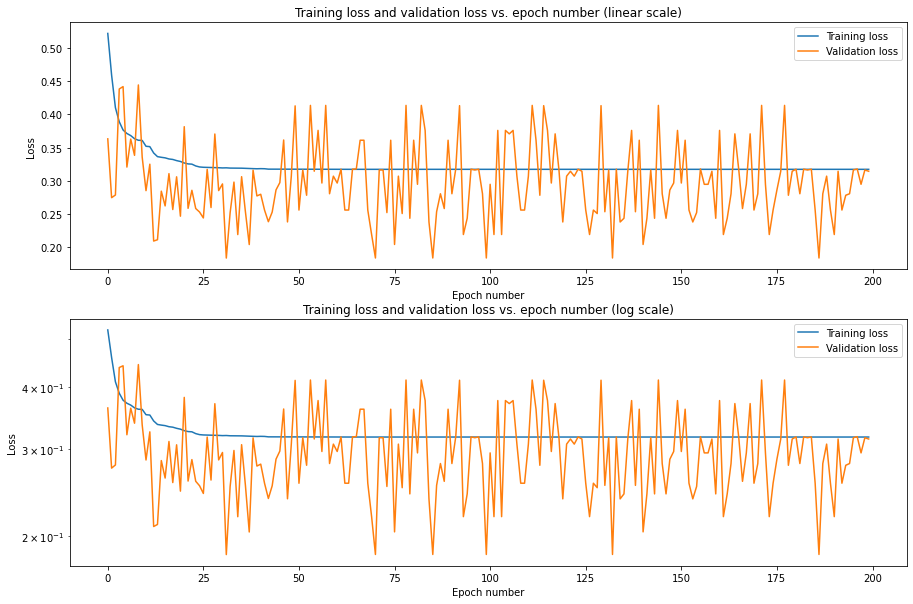

In [5]:
#@markdown ##Play the cell to show a plot of training errors vs. epoch number

epochNumber = []
lossDataFromCSV = []
vallossDataFromCSV = []

with open(os.path.join(full_QC_model_path, 'Quality Control', 'training_evaluation.csv'),'r') as csvfile:
    csvRead = csv.reader(csvfile, delimiter=',')
    next(csvRead)
    for row in csvRead:
        lossDataFromCSV.append(float(row[0]))
        vallossDataFromCSV.append(float(row[1]))

epochNumber = range(len(lossDataFromCSV))

plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.plot(epochNumber,lossDataFromCSV, label='Training loss')
plt.plot(epochNumber,vallossDataFromCSV, label='Validation loss')
plt.title('Training loss and validation loss vs. epoch number (linear scale)')
plt.ylabel('Loss')
plt.xlabel('Epoch number')
plt.legend()

plt.subplot(2,1,2)
plt.semilogy(epochNumber,lossDataFromCSV, label='Training loss')
plt.semilogy(epochNumber,vallossDataFromCSV, label='Validation loss')
plt.title('Training loss and validation loss vs. epoch number (log scale)')
plt.ylabel('Loss')
plt.xlabel('Epoch number')
plt.legend()
plt.savefig(os.path.join(full_QC_model_path, 'Quality Control', 'lossCurvePlots.png'),bbox_inches='tight',pad_inches=0)
plt.show()



## **5.2. Error mapping and quality metrics estimation**
---
<font size = 4>This section will calculate the Intersection over Union score for all the images provided in the Source_QC_folder and Target_QC_folder. The result for one of the image will also be displayed.

<font size = 4>The **Intersection over Union** metric is a method that can be used to quantify the percent overlap between the target mask and your prediction output. **Therefore, the closer to 1, the better the performance.** This metric can be used to assess the quality of your model to accurately predict nuclei. 

<font size = 4>The Input, Ground Truth, Prediction and IoU maps are shown below for the last example in the QC set.

<font size = 4> The results for all QC examples can be found in the "*Quality Control*" folder which is located inside your "model_folder".

### **Thresholds for image masks**

<font size = 4> Since the output from Unet is not a binary mask, the output images are converted to binary masks using thresholding. This section will test different thresholds (from 0 to 255) to find the one yielding the best IoU score compared with the ground truth. The best threshold for each image and the average of these thresholds will be displayed below. **These values can be a guideline when creating masks for unseen data in section 6.**

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Model input size: 512x512
Number of dataset found in the folder: 10



Running QC on: 91-0018.tif
Running QC on: 91-0168.tif
Running QC on: 91-0048.tif
Running QC on: 91-0089.tif
Running QC on: 91-0130.tif
Running QC on: 91-0323.tif
Running QC on: 91-0387.tif
Running QC on: 91-0345.tif
Running QC on: 91-0229.tif
Running QC on: 91-0275.tif


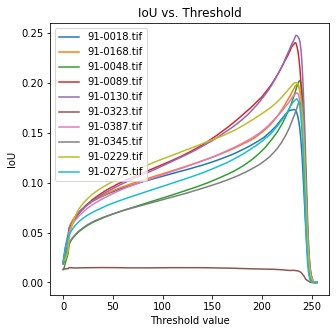

--------------------------------------------------------------


interactive(children=(Dropdown(description='file', options=('91-0018.tif', '91-0168.tif', '91-0048.tif', '91-0…

--------------------------------------------------------------
Best average threshold is: 212
--------------------------------------------------------------
------------------------------
QC PDF report exported as /content/gdrive/MyDrive/DL4MIC/data/model/my-model2/Quality Control/my-model2_QC_report.pdf


In [6]:
# ------------- User input ------------
#@markdown ##Choose the folders that contain your Quality Control dataset
Source_QC_folder = "/content/gdrive/MyDrive/DL4MIC/data/QC/images" #@param{type:"string"}
Target_QC_folder = "/content/gdrive/MyDrive/DL4MIC/data/QC/labels" #@param{type:"string"}


# ------------- Initialise folders ------------
# Create a quality control/Prediction Folder
prediction_QC_folder = os.path.join(full_QC_model_path, 'Quality Control', 'Prediction')
if os.path.exists(prediction_QC_folder):
  shutil.rmtree(prediction_QC_folder)

os.makedirs(prediction_QC_folder)


# ------------- Prepare the model and run predictions ------------

# Load the model
unet = load_model(os.path.join(full_QC_model_path, 'weights_best.hdf5'), custom_objects={'_weighted_binary_crossentropy': weighted_binary_crossentropy(np.ones(2))})
Input_size = unet.layers[0].output_shape[1:3]
print('Model input size: '+str(Input_size[0])+'x'+str(Input_size[1]))

# Create a list of sources
source_dir_list = os.listdir(Source_QC_folder)
number_of_dataset = len(source_dir_list)
print('Number of dataset found in the folder: '+str(number_of_dataset))

predictions = []
for i in tqdm(range(number_of_dataset)):
  predictions.append(predict_as_tiles(os.path.join(Source_QC_folder, source_dir_list[i]), unet))


# Save the results in the folder along with the masks according to the set threshold
saveResult(prediction_QC_folder, predictions, source_dir_list, prefix=prediction_prefix, threshold=None)

#-----------------------------Calculate Metrics----------------------------------------#

f = plt.figure(figsize=((5,5)))

with open(os.path.join(full_QC_model_path,'Quality Control', 'QC_metrics_'+QC_model_name+'.csv'), "w", newline='') as file:
  writer = csv.writer(file)
  writer.writerow(["File name","IoU", "IoU-optimised threshold"])  

  # Initialise the lists 
  filename_list = []
  best_threshold_list = []
  best_IoU_score_list = []

  for filename in os.listdir(Source_QC_folder):

    if not os.path.isdir(os.path.join(Source_QC_folder, filename)):
      print('Running QC on: '+filename)
      test_input = io.imread(os.path.join(Source_QC_folder, filename), as_gray=True)
      test_ground_truth_image = io.imread(os.path.join(Target_QC_folder, filename), as_gray=True)

      (threshold_list, iou_scores_per_threshold) = getIoUvsThreshold(os.path.join(prediction_QC_folder, prediction_prefix+filename), os.path.join(Target_QC_folder, filename))
      plt.plot(threshold_list,iou_scores_per_threshold, label=filename)

      # Here we find which threshold yielded the highest IoU score for image n.
      best_IoU_score = max(iou_scores_per_threshold)
      best_threshold = iou_scores_per_threshold.index(best_IoU_score)

      # Write the results in the CSV file
      writer.writerow([filename, str(best_IoU_score), str(best_threshold)])

      # Here we append the best threshold and score to the lists
      filename_list.append(filename)
      best_IoU_score_list.append(best_IoU_score)
      best_threshold_list.append(best_threshold)

# Display the IoV vs Threshold plot
plt.title('IoU vs. Threshold')
plt.ylabel('IoU')
plt.xlabel('Threshold value')
plt.legend()
plt.savefig(full_QC_model_path+'/Quality Control/'+QC_model_name+'_IoUvsThresholdPlot.png',bbox_inches='tight',pad_inches=0)
plt.show()


# Table with metrics as dataframe output
pdResults = pd.DataFrame(index = filename_list)
pdResults["IoU"] = best_IoU_score_list
pdResults["IoU-optimised threshold"] = best_threshold_list

average_best_threshold = sum(best_threshold_list)/len(best_threshold_list)


# ------------- For display ------------
print('--------------------------------------------------------------')
@interact
def show_QC_results(file=os.listdir(Source_QC_folder)):
  
  plt.figure(figsize=(25,5))
  #Input
  plt.subplot(1,4,1)
  plt.axis('off')
  plt.imshow(plt.imread(os.path.join(Source_QC_folder, file)), aspect='equal', cmap='gray', interpolation='nearest')
  plt.title('Input')

  #Ground-truth
  plt.subplot(1,4,2)
  plt.axis('off')
  test_ground_truth_image = io.imread(os.path.join(Target_QC_folder, file),as_gray=True)
  plt.imshow(test_ground_truth_image, aspect='equal', cmap='Greens')
  plt.title('Ground Truth')

  #Prediction
  plt.subplot(1,4,3)
  plt.axis('off')
  test_prediction = plt.imread(os.path.join(prediction_QC_folder, prediction_prefix+file))
  test_prediction_mask = np.empty_like(test_prediction)
  test_prediction_mask[test_prediction > average_best_threshold] = 255
  test_prediction_mask[test_prediction <= average_best_threshold] = 0
  plt.imshow(test_prediction_mask, aspect='equal', cmap='Purples')
  plt.title('Prediction')

  #Overlay
  plt.subplot(1,4,4)
  plt.axis('off')
  plt.imshow(test_ground_truth_image, cmap='Greens')
  plt.imshow(test_prediction_mask, alpha=0.5, cmap='Purples')
  metrics_title = 'Overlay (IoU: ' + str(round(pdResults.loc[file]["IoU"],3)) + ' T: ' + str(round(pdResults.loc[file]["IoU-optimised threshold"])) + ')'
  plt.title(metrics_title)
  plt.savefig(full_QC_model_path+'/Quality Control/QC_example_data.png',bbox_inches='tight',pad_inches=0)


print('--------------------------------------------------------------')
print('Best average threshold is: '+str(round(average_best_threshold)))
print('--------------------------------------------------------------')

pdResults.head()

qc_pdf_export()

# **6. Using the trained model**

---
<font size = 4>In this section the unseen data is processed using the trained model (in section 4). First, your unseen images are uploaded and prepared for prediction. After that your trained model from section 4 is activated and finally saved into your Google Drive.

## **6.1 Generate prediction(s) from unseen dataset**
---

<font size = 4>The current trained model (from section 4.1) can now be used to process images. If you want to use an older model, untick the **Use_the_current_trained_model** box and enter the name and path of the model to use. Predicted output images are saved in your **Result_folder** folder.

<font size = 4>**`Data_folder`:** This folder should contain the images that you want to use your trained network on for processing.

<font size = 4>**`Result_folder`:** This folder will contain the predicted output images.

<font size = 4> Once the predictions are complete the cell will display a random example prediction beside the input image and the calculated mask for visual inspection.

<font size = 4> **Troubleshooting:** If there is a low contrast image warning when saving the images, this may be due to overfitting of the model to the data. It may result in images containing only a single colour. Train the network again with different network hyperparameters.

In [ ]:


# ------------- Initial user input ------------
#@markdown ###Provide the path to your dataset and to the folder where the prediction will be saved (Result folder), then play the cell to predict output on your unseen images.
Data_folder = '' #@param {type:"string"}
Results_folder = '' #@param {type:"string"}

#@markdown ###Do you want to use the current trained model?
Use_the_current_trained_model = True #@param {type:"boolean"}

#@markdown ###If not, please provide the path to the model folder:

Prediction_model_folder = "" #@param {type:"string"}

#Here we find the loaded model name and parent path
Prediction_model_name = os.path.basename(Prediction_model_folder)
Prediction_model_path = os.path.dirname(Prediction_model_folder)


# ------------- Failsafes ------------
if (Use_the_current_trained_model): 
  print("Using current trained network")
  Prediction_model_name = model_name
  Prediction_model_path = model_path

full_Prediction_model_path = os.path.join(Prediction_model_path, Prediction_model_name)
if os.path.exists(full_Prediction_model_path):
  print("The "+Prediction_model_name+" network will be used.")
else:
  print(R+'!! WARNING: The chosen model does not exist !!'+W)
  print('Please make sure you provide a valid model path and model name before proceeding further.')


# ------------- Prepare the model and run predictions ------------

# Load the model and prepare generator



unet = load_model(os.path.join(Prediction_model_path, Prediction_model_name, 'weights_best.hdf5'), custom_objects={'_weighted_binary_crossentropy': weighted_binary_crossentropy(np.ones(2))})
Input_size = unet.layers[0].output_shape[1:3]
print('Model input size: '+str(Input_size[0])+'x'+str(Input_size[1]))

# Create a list of sources
source_dir_list = os.listdir(Data_folder)
number_of_dataset = len(source_dir_list)
print('Number of dataset found in the folder: '+str(number_of_dataset))

predictions = []
for i in tqdm(range(number_of_dataset)):
  predictions.append(predict_as_tiles(os.path.join(Data_folder, source_dir_list[i]), unet))
  # predictions.append(prediction(os.path.join(Data_folder, source_dir_list[i]), os.path.join(Prediction_model_path, Prediction_model_name)))


# Save the results in the folder along with the masks according to the set threshold
saveResult(Results_folder, predictions, source_dir_list, prefix=prediction_prefix, threshold=None)


# ------------- For display ------------
print('--------------------------------------------------------------')


def show_prediction_mask(file=os.listdir(Data_folder), threshold=(0,255,1)):

  plt.figure(figsize=(18,6))
  # Wide-field
  plt.subplot(1,3,1)
  plt.axis('off')
  img_Source = plt.imread(os.path.join(Data_folder, file))
  plt.imshow(img_Source, cmap='gray')
  plt.title('Source image',fontsize=15)
  # Prediction
  plt.subplot(1,3,2)
  plt.axis('off')
  img_Prediction = plt.imread(os.path.join(Results_folder, prediction_prefix+file))
  plt.imshow(img_Prediction, cmap='gray')
  plt.title('Prediction',fontsize=15)

  # Thresholded mask
  plt.subplot(1,3,3)
  plt.axis('off')
  img_Mask = convert2Mask(img_Prediction, threshold)
  plt.imshow(img_Mask, cmap='gray')
  plt.title('Mask (Threshold: '+str(round(threshold))+')',fontsize=15)


interact(show_prediction_mask, continuous_update=False);



## **6.2. Export results as masks**
---


In [ ]:

# @markdown #Play this cell to save results as masks with the chosen threshold
threshold =  120#@param {type:"number"}

saveResult(Results_folder, predictions, source_dir_list, prefix=prediction_prefix, threshold=threshold)
print('-------------------')
print('Masks were saved in: '+Results_folder)




## **6.3. Download your predictions**
---

<font size = 4>**Store your data** and ALL its results elsewhere by downloading it from Google Drive and after that clean the original folder tree (datasets, results, trained model etc.) if you plan to train or use new networks. Please note that the notebook will otherwise **OVERWRITE** all files which have the same name.

# **7. Version log**

---
<font size = 4>**v1.13**: 
* This version now includes an automatic restart allowing to set the h5py library to v2.10. 
* The section 1 and 2 are now swapped for better export of *requirements.txt*. 
* This version also now includes built-in version check and the version log that you're reading now.

---

#**Thank you for using 2D U-Net!**
